<a href="https://colab.research.google.com/github/Jash-Bhatia/Machine_Learning/blob/master/ML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **LAB PART 1**

In [2]:
## reading the data and printing the first 5 lines

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
 "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
 "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
 "peak-rpm","city-mpg","highway-mpg","price"]

auto_data = pd.read_csv(filename, names = headers)

In [3]:
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
##Are there missing data? Or illegal characters in the dataframe?

auto_data.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
auto_data.dtypes.value_counts()

object     16
int64       5
float64     5
dtype: int64

In [6]:
auto_data.replace(to_replace='?',value=np.nan,inplace=True)

In [7]:
auto_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Missing Values in the Data Column Wise:

normalized-losses - 41

num-of-doors - 2

bore - 4

stroke - 4

horsepower - 2

peak-rpm - 2

price - 4


Drop rows where price is a missing value

In [8]:
auto_data.drop(auto_data[auto_data.price.isnull()].index, axis=0, inplace=True)
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [9]:
##Replacing the NA values of quantitative columns with the mean of the column

#normalized-losses
avg_norm_losses = auto_data['normalized-losses'].astype('float').mean(axis =0)
auto_data['normalized-losses'].replace(np.nan,avg_norm_losses,inplace = True)

#bore
avg_norm_losses = auto_data['bore'].astype('float').mean(axis =0)
auto_data['bore'].replace(np.nan,avg_norm_losses,inplace = True)

#stroke
avg_norm_losses = auto_data['stroke'].astype('float').mean(axis =0)
auto_data['stroke'].replace(np.nan,avg_norm_losses,inplace = True)

#horsepower
avg_norm_losses = auto_data['horsepower'].astype('float').mean(axis =0)
auto_data['horsepower'].replace(np.nan,avg_norm_losses,inplace = True)

#peak-rpm
avg_norm_losses = auto_data['peak-rpm'].astype('float').mean(axis =0)
auto_data['peak-rpm'].replace(np.nan,avg_norm_losses,inplace = True)

#Num-Of-Doors - replace the NA values with the median of the column
auto_data['num-of-doors'].replace(np.nan,auto_data['num-of-doors'].value_counts().idxmax(),inplace = True )


auto_data.shape

(201, 26)

In [10]:
##Reset the index of the dataframe

auto_data.reset_index

<bound method DataFrame.reset_index of      symboling normalized-losses         make  ... city-mpg highway-mpg  price
0            3               122  alfa-romero  ...       21          27  13495
1            3               122  alfa-romero  ...       21          27  16500
2            1               122  alfa-romero  ...       19          26  16500
3            2               164         audi  ...       24          30  13950
4            2               164         audi  ...       18          22  17450
..         ...               ...          ...  ...      ...         ...    ...
200         -1                95        volvo  ...       23          28  16845
201         -1                95        volvo  ...       19          25  19045
202         -1                95        volvo  ...       18          23  21485
203         -1                95        volvo  ...       26          27  22470
204         -1                95        volvo  ...       19          25  22625

[201 rows x 

In [11]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [12]:
##Checking the data type of the columns and converting numeric and quantitative columns to float or int

for i in auto_data._get_numeric_data().columns:
    auto_data[i] = auto_data[i].astype('float')
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    float64
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    float64
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [13]:
##Transforming city-mpg and highway-mpg into liters/100km

auto_data['city-L/100km'] = 235/auto_data['city-mpg']
auto_data['highway-L/100km'] = 235/auto_data['highway-mpg']

##Normalize columns length, width, height so that their values range from 0 to 1

auto_data['length'] = auto_data['length']/auto_data['length'].max()
auto_data['width'] = auto_data['width']/auto_data['width'].max()
auto_data['height'] = auto_data['height']/auto_data['height'].max()

auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3.0,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495,11.190476,8.703704
1,3.0,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500,11.190476,8.703704
2,1.0,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500,12.368421,9.038462
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950,9.791667,7.833333
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450,13.055556,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845,10.217391,8.392857
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045,12.368421,9.400000
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485,13.055556,10.217391
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217.0,ohc,six,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470,9.038462,8.703704


(array([14., 49., 30., 30., 38.,  2., 12., 13.,  8.,  1.,  3.,  0.,  0.,
         1.]), array([ 48.        ,  63.28571429,  78.57142857,  93.85714286,
        109.14285714, 124.42857143, 139.71428571, 155.        ,
        170.28571429, 185.57142857, 200.85714286, 216.14285714,
        231.42857143, 246.71428571, 262.        ]), <a list of 14 Patch objects>)

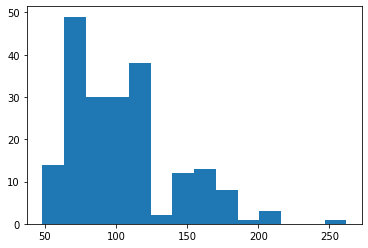

In [14]:
##Plotting Histogram of the Horsepower

auto_data['horsepower'] = auto_data['horsepower'].astype('int')
plt.hist(auto_data.horsepower, bins='auto', rwidth=2, histtype='bar')

In [15]:
##Create three equal sized bins “low”, “medium”, “high” and organize values in column horsepower into new column “horsepower-binned”

temp = pd.cut(auto_data['horsepower'], bins = 3, labels = ['low','medium','high'])
auto_data['horsepower-binned'] = temp
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3.0,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495,11.190476,8.703704,low
1,3.0,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500,11.190476,8.703704,low
2,1.0,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500,12.368421,9.038462,medium
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950,9.791667,7.833333,low
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450,13.055556,10.681818,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845,10.217391,8.392857,low
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045,12.368421,9.400000,medium
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485,13.055556,10.217391,medium
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217.0,ohc,six,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470,9.038462,8.703704,low


(array([153.,   0.,   0.,   0.,   0.,  43.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

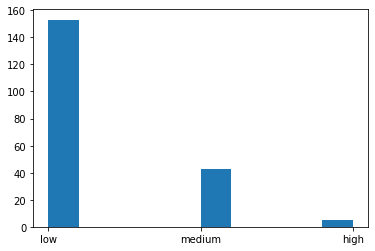

In [16]:
##Plot the distribution of horsepower-binned

plt.hist(auto_data['horsepower-binned'])

In [17]:
##Convert fuel-type and aspiration into one hot encoded variable

one_hot1 = pd.get_dummies(auto_data['fuel-type'])
one_hot2 = pd.get_dummies(auto_data['aspiration'])
auto_data = auto_data.join(one_hot1)
auto_data = auto_data.join(one_hot2)
auto_data.drop("fuel-type", axis = 1, inplace=True)
auto_data.drop("aspiration", axis = 1, inplace=True)

auto_data

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3.0,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495,11.190476,8.703704,low,0,1,1,0
1,3.0,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500,11.190476,8.703704,low,0,1,1,0
2,1.0,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500,12.368421,9.038462,medium,0,1,1,0
3,2.0,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950,9.791667,7.833333,low,0,1,1,0
4,2.0,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450,13.055556,10.681818,low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845,10.217391,8.392857,low,0,1,1,0
201,-1.0,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045,12.368421,9.400000,medium,0,1,0,1
202,-1.0,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485,13.055556,10.217391,medium,0,1,1,0
203,-1.0,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217.0,ohc,six,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470,9.038462,8.703704,low,1,0,0,1


# **LAB PART 2**

In [18]:
filename1 = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
car = pd.read_csv(filename1)
car.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [20]:
correlation = car.corr()

In [21]:
##Identify variables with positive correlation with price

for i in car.describe().columns:
    temp = correlation['price'][i]
    if (temp > 0):
       print(i)

print('\n')

##Identify variables with negative correlation with price

for i in car.describe().columns:
    temp = correlation['price'][i]
    if (temp < 0):
       print(i)

normalized-losses
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
price
city-L/100km
diesel


symboling
peak-rpm
city-mpg
highway-mpg
gas


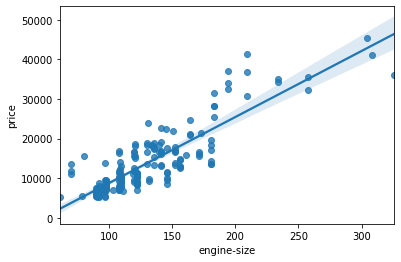

In [22]:
##Plotting relation between engine size and price using Seaborn

sns.regplot('engine-size', 'price', data=car)

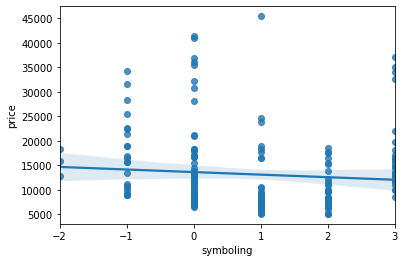

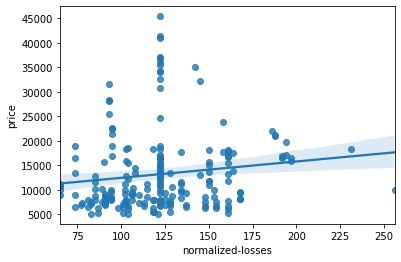

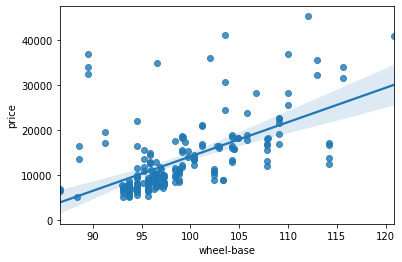

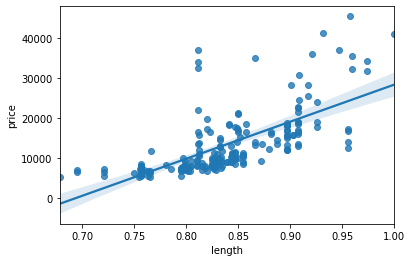

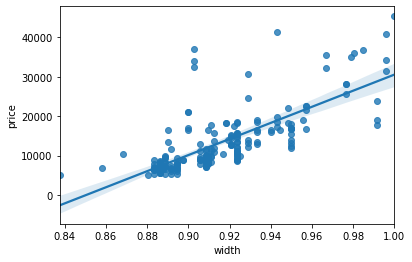

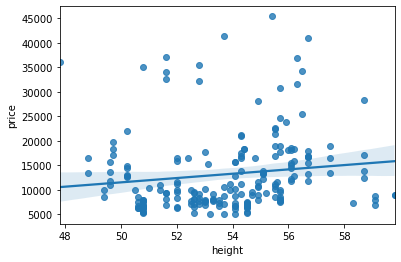

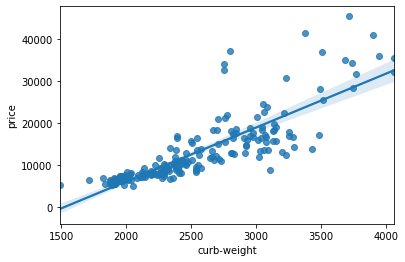

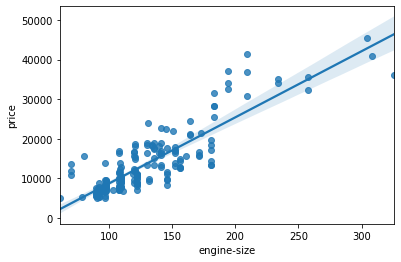

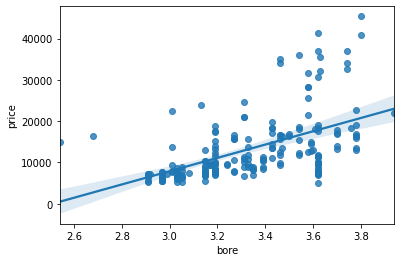

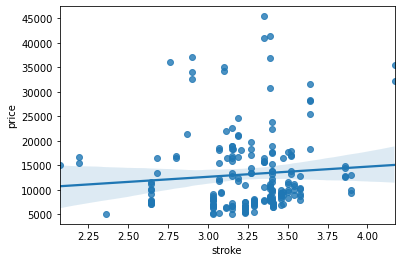

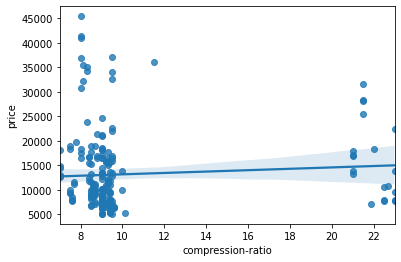

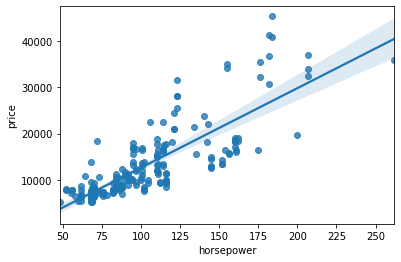

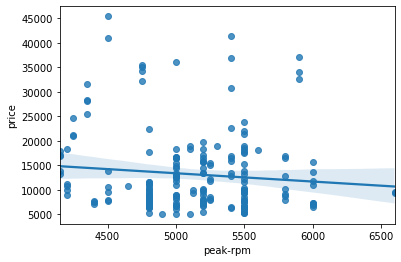

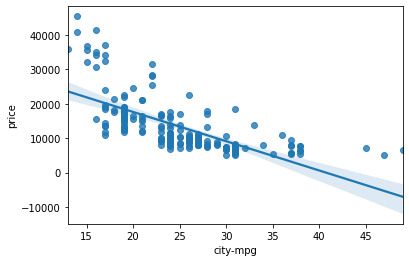

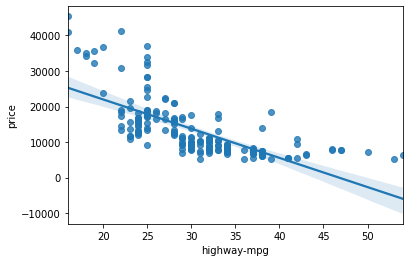

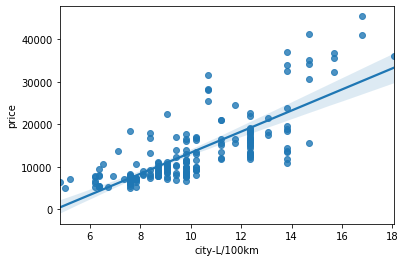

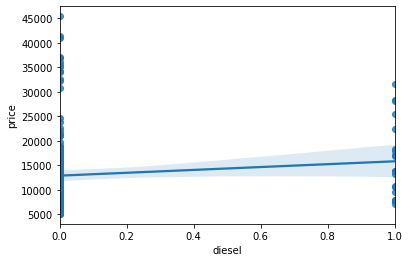

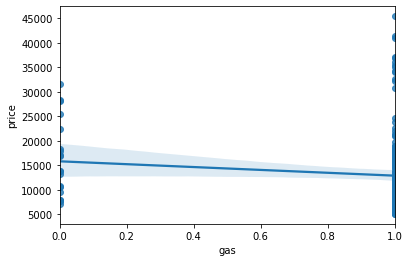

In [23]:
##Seeing other columns which can affect price

for i in car.describe().columns:
    if i!='price':
        sns.regplot(y='price', x=i, data = car)
        plt.show()

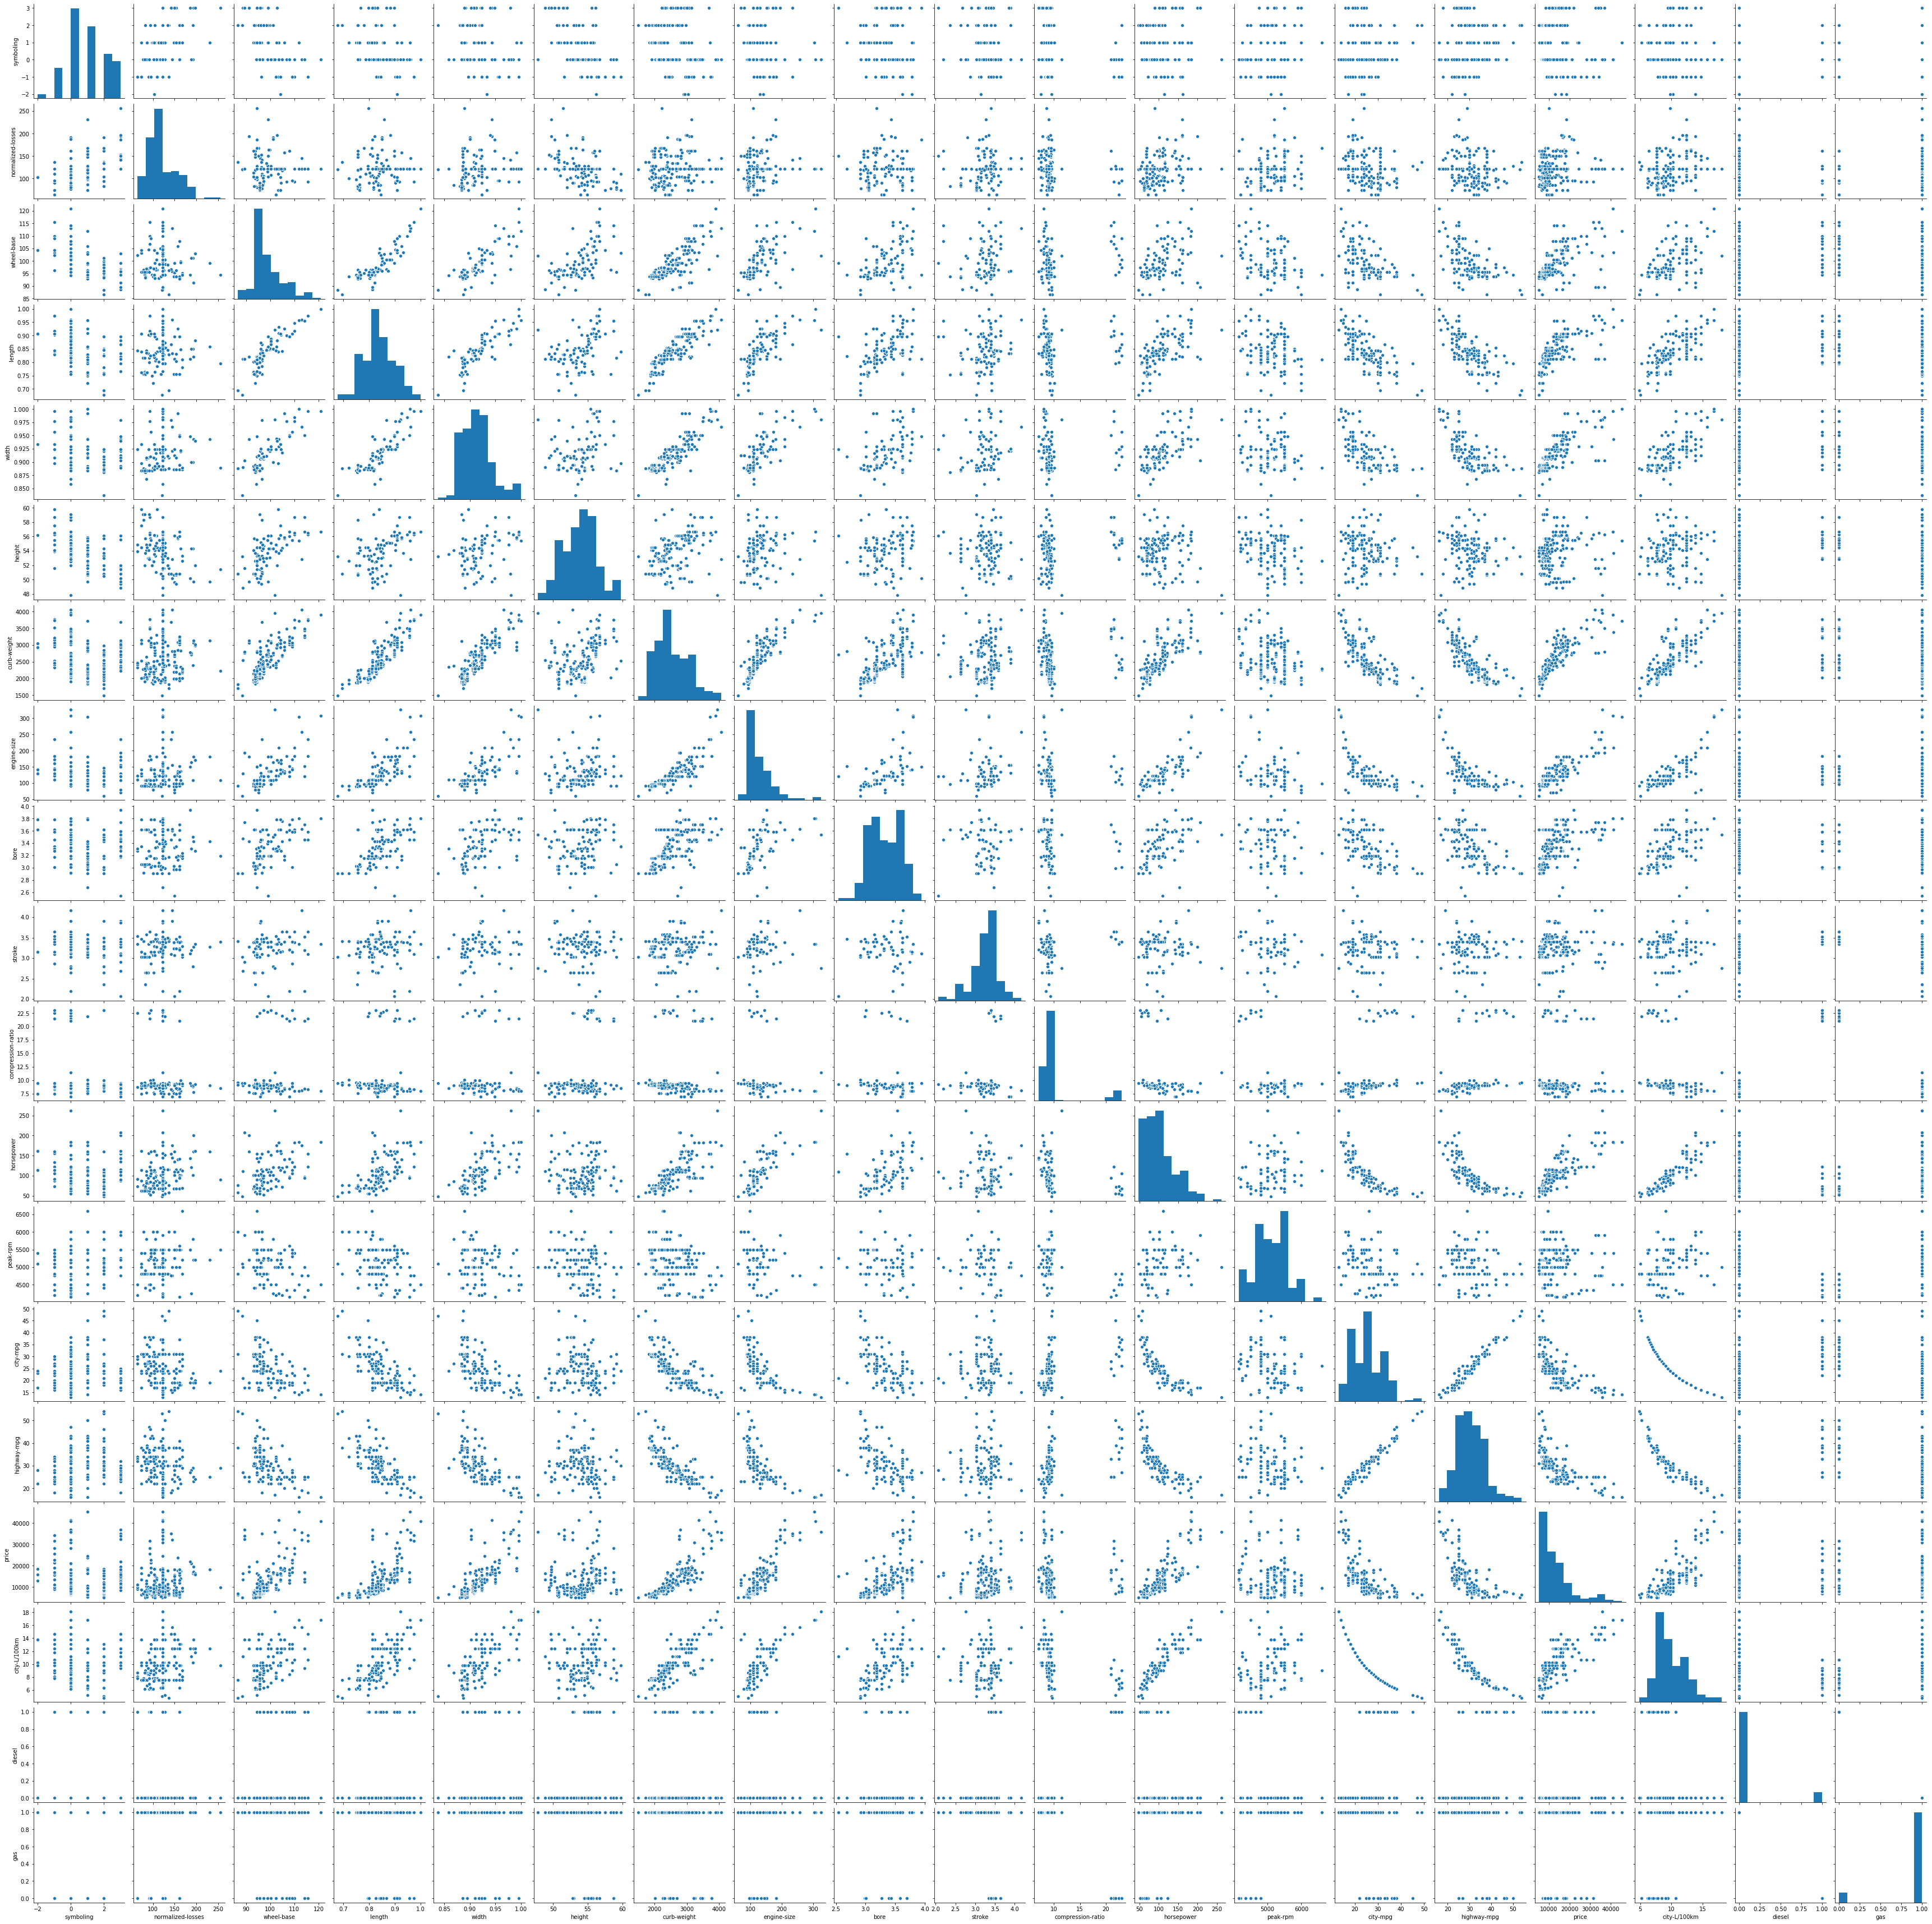

In [24]:
##Plotting a pairplot to see which variables can affect price

sns.pairplot(car)
plt.show()

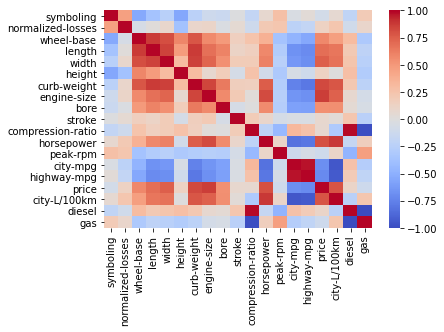

In [25]:
##Heatmap of the correlation

sns.heatmap(correlation,center=0,cmap='coolwarm')
plt.show()

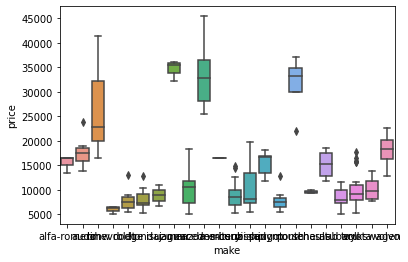

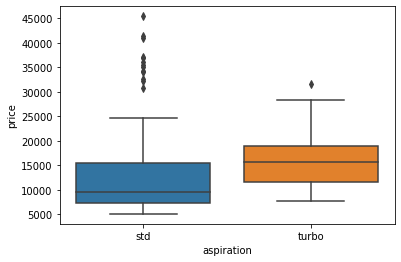

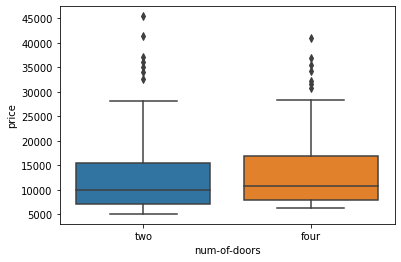

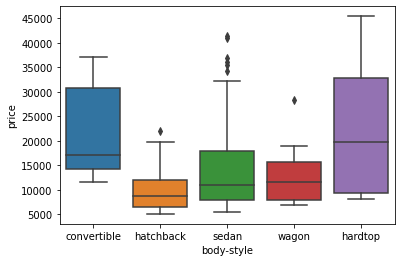

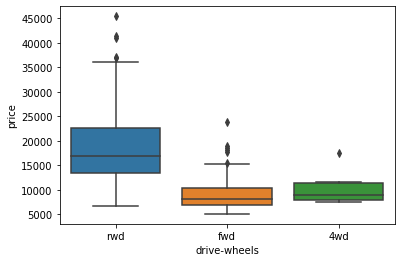

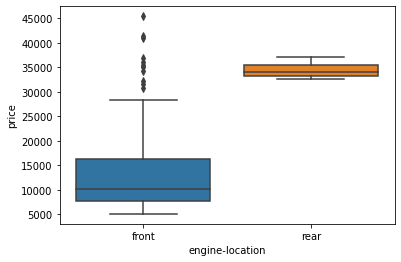

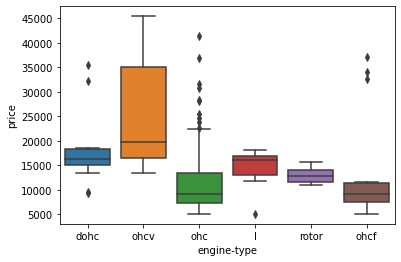

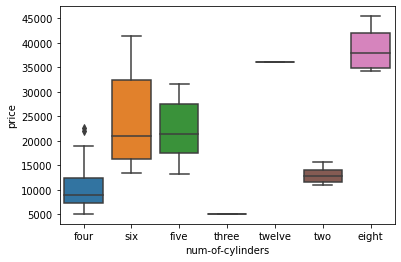

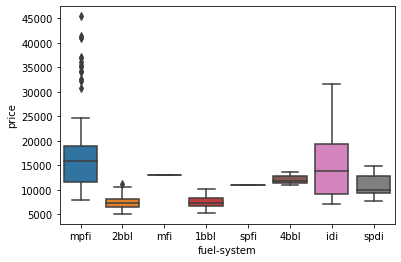

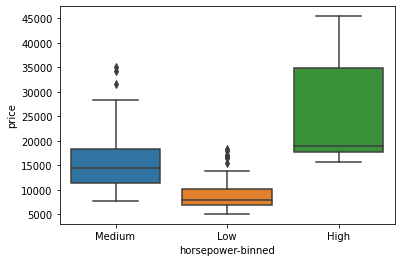

In [26]:
##Plotting a boxplot to compare body-style and other categorical variables to price of the car

for i in car.describe(include = np.object).columns:
    sns.boxplot(x=car[i], y=car.price)
    plt.show()

**Observations :-**

body-style - More or less the price range for every body type car is well defined with rarely any outliers, with the excpetion of sedan. There are a lot of sport sedans which cost more than the average sedan and cost more and hence are outliers in the data.

drive-wheelse - Majority of the cars have rear wheel drive and have very few outliers. Cars with front wheel or all wheel drive are fairly less and have a very short and well defined range for their price.

engine-locatione - Again, the majority of the cars have enging in the front and the and have a well defined price range. The cars with rear engines and the outliers of cars with front engines are majorly sports cars and that is why they are priced higher overall.

horsepower-binned - We can see that as the horsepower of a car increases, the price of the car also increases and the range to define the price of a car with low, medium or high horsepower gets broaded and broader.

In [27]:
car.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [28]:
car.describe(include=np.object)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [29]:
##Getting unique values in each categorical variable along with their frequency¶

for i in car.describe(include=np.object).columns:
    print(i)
    print(car[i].value_counts())
    print('*****\n*****')

make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
*****
*****
aspiration
std      165
turbo     36
Name: aspiration, dtype: int64
*****
*****
num-of-doors
four    115
two      86
Name: num-of-doors, dtype: int64
*****
*****
body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
*****
*****
drive-wheels
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
*****
*****
engine-location
front    198
rear       3
Name: engine-location, dtype: int64
*****
*****
engine-type
ohc      145
ohcf  

After observing certain groups we can say that certain segments are most sold.
For eg. majority of the cars have standard aspiration, prefer 4 door cars over 2 doors, sedan and hatchback are the most sought after models. We can also see that people like their car engines in the front, and engine type of ohc with majority having 6 cylinders.

In [30]:
##Using groupby() to get the average price of “drive-wheels” and other categorical Variables with respect to “price”

for i in car.describe(include=np.object).columns:
    print(car.groupby(i)['price'].mean())
    print('----')

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64
----
aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64
----
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64
----
body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wag

Observations:-

We can see that the average price of cars with rear wheel drive is more than that of other cars. We can infer two major things from this:-
As we had seen earlier that a large proportion of the cars (38-39%) had rear wheel drive and the prices of these cars ranged from very low to very high, that is why we could be seeing a high average for cars with rear wheel drive.
We also see that the 4 wheel drive cars have a relatively high average even though there are very very few cars of that type (3-4%). We obtain this avergae because all the cars are relatively evenly priced and thus there is a lot less range in the price of the cars with 4 wheel drive which can affect the average price.

In [31]:
##Using groupby() to find the average price for “drive-wheels” and ”body-style” with price

temp = car.groupby(['drive-wheels','body-style'])['price'].mean()
temp

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64

In [32]:
##Making a pivot table for it

temp = car[['drive-wheels','body-style','price']]
for_pivot = temp.groupby(['drive-wheels','body-style'], as_index=False).mean()
piv1 = for_pivot.pivot(index = 'drive-wheels', columns = 'body-style')
piv1

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]


Observations:-

- We can see that there are no convertibles or hardtops in the 4 wheel drive and the avergae price of sedan cars is the most in a 4 wheel drive system.
- We can see that convertibles have a higher overall price average in forward wheel drive, while hatchback and hardtop and sedan and wagon are relatively close in their average pricing.
- We can see that rear wheel drive convertibles are the most expensive closely followed by the hardtop cars

In [33]:
##Doing the same thing for other variables

cols = car.describe(include=np.object).columns
redundant = []
for i in cols:
    redundant.append(i)
    for j in cols:
        if i==j or j in redundant:
            continue
        else:
            #print(i,' and ',' with respect to price')
            temp = car.groupby([i,j])['price'].mean()
            print(temp, end='\n\n')
            temp = car[[i,j,'price']]
            for_pivot = temp.groupby([i,j], as_index=False).mean()
            piv = for_pivot.pivot(index = i, columns = j)
            piv.replace(np.nan, '-', inplace= True)
            print('Pivot Table')
            print(piv)
            print('------', end='\n\n')

make           aspiration
alfa-romero    std           15498.333333
audi           std           16656.000000
               turbo         23875.000000
bmw            std           26118.750000
chevrolet      std            6007.000000
dodge          std            6900.000000
               turbo          9826.333333
honda          std            8184.692308
isuzu          std            8916.500000
jaguar         std           34600.000000
mazda          std           10652.882353
mercedes-benz  std           38900.000000
               turbo         28394.000000
mercury        turbo         16503.000000
mitsubishi     std            7314.714286
               turbo         11485.666667
nissan         std            9869.588235
               turbo         19699.000000
peugot         std           14649.000000
               turbo         16189.166667
plymouth       std            7004.600000
               turbo         10360.500000
porsche        std           31400.500000
renault 

Observations :-

We can see that there are no cars with medium or low horsepower which have their engine in rear. These are majorly the sports cars of segment. We also see that of all the segments, the cars having engine in the front and with low horsepower have the lowest average price of any car.

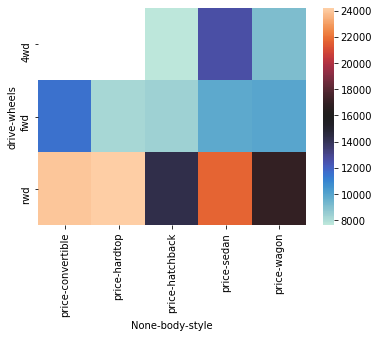

In [34]:
##Plotting a heatmap for the table
#Heatmap for drive-wheels and body-style in relation to their price
sns.heatmap(piv1,center=16000)

In [35]:
##Finding pearson coefficient between 'wheel-base' and 'price'

from scipy.stats import pearsonr
pear, p_val = pearsonr(car['wheel-base'], car['price'])
print(pear, p_val)

0.584641822265508 8.076488270733218e-20


In [36]:
##Doing a one way anova test if different groups of 'drive-wheels' are correlated with 'price'

from scipy import stats
temp1 = car[['drive-wheels', 'body-style','price']]
temp = temp1[['drive-wheels', 'price']].groupby(['drive-wheels'])
temp
f_val, p_val = stats.f_oneway(temp.get_group('fwd')['price'], 
                              temp.get_group('4wd')['price'], 
                              temp.get_group('rwd')['price'])